<a href="https://colab.research.google.com/github/juanflaso/ProyectoMineria/blob/master/ProyectoNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
drive.mount("./drive", force_remount=True)

%cd "./drive/My Drive/widsdatathon2020"
!ls -l

Mounted at ./drive
/content/drive/My Drive/widsdatathon2020
total 164108
-rw------- 1 root root       52 Jan 15 18:37  samplesubmission.csv
-rw------- 1 root root   320363 Jan 15 18:37  solution_template.csv
-rw------- 1 root root 11709733 Feb  4 03:19  training_resumido_modif.csv
-rw------- 1 root root 63894166 Feb  2 21:15  training_v2.csv
-rw------- 1 root root 64356456 Feb  2 21:16  training_v2_data_manipulada.csv
-rw------- 1 root root 27733653 Jan 15 18:37  unlabeled.csv
-rw------- 1 root root    29944 Jan 15 18:37 'WiDS Datathon 2020 Dictionary.csv'


In [0]:
import pandas as pd

data = pd.read_csv("training_resumido_modif.csv")


data = data.drop(91713)
data = data.drop(91714)
data.tail()


,hospital_death,age,elective_surgery,apache_4a_hospital_death_prob,d1_heartrate_max,icu_type,count_na_exams,count_diseases,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,d1_albumin_max,d1_bilirubin_min,d1_bun_max,gcs_motor_apache,d1_hemaglobin_max,ventilated_apache,d1_arterial_pco2_max,d1_arterial_ph_max,d1_sodium_max,temp_apache,glucose_apache,wbc_apache,d1_sysbp_invasive_min,d1_sysbp_noninvasive_max,d1_calcium_min,d1_hco3_max,d1_inr_min,d1_lactate_min,d1_platelets_min,d1_potassium_min
91708,0.0,75.0,0.0,0.12,115.0,Cardiac ICU,41.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.97,27.0,6.0,13.2,1.0,48.0,7.34,140.0,36.6,381.0,11.84,96.04,128.0,8.20,28.00,1.10,1.74,92.00,4.20
91709,0.0,56.0,0.0,0.03,100.0,Med-Surg ICU,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,34.0,6.0,10.5,0.0,85.0,7.26,136.0,37.4,177.0,4.22,81.00,127.0,7.80,30.00,1.43,1.40,133.00,3.80
91710,0.0,48.0,0.0,0.05,158.0,Med-Surg ICU,77.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.1,0.97,33.0,6.0,12.3,0.0,20.0,7.36,139.0,35.8,538.0,17.55,96.04,110.0,6.60,20.00,1.43,1.74,227.00,3.20
91711,0.0,62.0,0.0,0.07,82.0,Med-Surg ICU,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,5.0,11.5,0.0,39.0,7.37,139.0,36.3,158.0,11.84,96.04,153.0,8.21,24.52,1.43,1.74,198.34,3.93
91712,0.0,82.0,1.0,0.19,104.0,Med-Surg ICU,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.50,27.0,6.0,11.9,1.0,45.0,7.39,132.0,36.0,158.0,24.40,96.04,110.0,7.40,22.00,1.50,1.74,420.00,4.90


In [0]:
label = data['hospital_death']

x = data.copy()

del x['hospital_death']

In [0]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,icu_type
0,CTICU
1,Med-Surg ICU
2,Med-Surg ICU
3,CTICU
4,Med-Surg ICU


In [0]:
icuTypes = pd.get_dummies(obj_df, columns=["icu_type"])
icuTypes.head()


,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0


In [0]:
x = pd.concat([x,icuTypes], axis=1, sort=False)
del x['icu_type']
x.head()

,age,elective_surgery,apache_4a_hospital_death_prob,d1_heartrate_max,count_na_exams,count_diseases,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,d1_albumin_max,d1_bilirubin_min,d1_bun_max,gcs_motor_apache,d1_hemaglobin_max,ventilated_apache,d1_arterial_pco2_max,d1_arterial_ph_max,d1_sodium_max,temp_apache,glucose_apache,wbc_apache,d1_sysbp_invasive_min,d1_sysbp_noninvasive_max,d1_calcium_min,d1_hco3_max,d1_inr_min,d1_lactate_min,d1_platelets_min,d1_potassium_min
0,68.0,0.0,0.10,119.0,60.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.3,0.40,31.0,6.0,8.9,0.0,45.0,7.39,136.0,39.3,168.0,14.10,64.00,131.0,7.40,19.00,1.43,1.00,233.00,3.40
1,77.0,0.0,0.47,118.0,19.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.6,0.50,11.0,3.0,11.3,1.0,37.0,7.45,145.0,35.1,145.0,12.70,96.04,159.0,8.00,27.00,1.30,3.50,487.00,3.80
2,25.0,0.0,0.00,96.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.5,0.0,45.0,7.39,139.0,36.7,158.0,11.84,96.04,148.0,8.21,24.52,1.43,1.74,198.34,3.93
3,81.0,1.0,0.04,116.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.6,1.0,37.0,7.44,139.0,34.8,185.0,8.00,78.00,158.0,8.21,24.52,1.10,1.74,43.00,3.50
4,19.0,0.0,0.09,89.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.5,0.0,45.0,7.39,139.0,36.7,158.0,11.84,96.04,147.0,8.21,24.52,1.43,1.74,198.34,3.93


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, label, train_size=0.8, random_state=0)

In [0]:
data.tail()

,hospital_death,age,elective_surgery,apache_4a_hospital_death_prob,d1_heartrate_max,icu_type,count_na_exams,count_diseases,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,d1_albumin_max,d1_bilirubin_min,d1_bun_max,gcs_motor_apache,d1_hemaglobin_max,ventilated_apache,d1_arterial_pco2_max,d1_arterial_ph_max,d1_sodium_max,temp_apache,glucose_apache,wbc_apache,d1_sysbp_invasive_min,d1_sysbp_noninvasive_max,d1_calcium_min,d1_hco3_max,d1_inr_min,d1_lactate_min,d1_platelets_min,d1_potassium_min
91708,0.0,75.0,0.0,0.12,115.0,Cardiac ICU,41.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.97,27.0,6.0,13.2,1.0,48.0,7.34,140.0,36.6,381.0,11.84,96.04,128.0,8.20,28.00,1.10,1.74,92.00,4.20
91709,0.0,56.0,0.0,0.03,100.0,Med-Surg ICU,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,34.0,6.0,10.5,0.0,85.0,7.26,136.0,37.4,177.0,4.22,81.00,127.0,7.80,30.00,1.43,1.40,133.00,3.80
91710,0.0,48.0,0.0,0.05,158.0,Med-Surg ICU,77.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.1,0.97,33.0,6.0,12.3,0.0,20.0,7.36,139.0,35.8,538.0,17.55,96.04,110.0,6.60,20.00,1.43,1.74,227.00,3.20
91711,0.0,62.0,0.0,0.07,82.0,Med-Surg ICU,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,5.0,11.5,0.0,39.0,7.37,139.0,36.3,158.0,11.84,96.04,153.0,8.21,24.52,1.43,1.74,198.34,3.93
91712,0.0,82.0,1.0,0.19,104.0,Med-Surg ICU,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.50,27.0,6.0,11.9,1.0,45.0,7.39,132.0,36.0,158.0,24.40,96.04,110.0,7.40,22.00,1.50,1.74,420.00,4.90


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x.dtypes

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
train_pca = scaler.transform(x_train)
test_pca = scaler.transform(x_test)

pca = PCA(.95, svd_solver='full')

pca.fit(x)

train_pca = pca.transform(x_train)
test_pca = pca.transform(x_test)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', priors=None, n_components=None, store_covariance=True, tol=0.0001)
clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

y_pred = clf.predict(x_test)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

x_test_lda = clf.transform(x_test)
x_train_lda = clf.transform(x_train)

0.9209507714114376
0.5857253685027153
0.45182525433871934


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

gnb = GaussianNB(priors=None, var_smoothing=0.02)

gnb.fit(train_pca, y_train)

print(gnb.score(test_pca, y_test))

y_pred = gnb.predict(test_pca)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

0.8988169874066402
0.31683168316831684
0.09575104727707959


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

gnb = GaussianNB(priors=None, var_smoothing=0.02)

gnb.fit(x_train_lda, y_train)

print(gnb.score(x_test_lda, y_test))

y_pred = gnb.predict(x_test_lda)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

0.9212233549582948
0.5889763779527559
0.44763614602034707


In [0]:
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)

x_test_scaled = preprocessing.scale(x_test)



In [0]:
from sklearn.preprocessing import MinMaxScaler, normalize
scaler = MinMaxScaler()
scaled_positive_x = scaler.fit_transform(x_train)
scaled_positive_x_test = scaler.fit_transform(x_test)
normalized_x = normalize(scaled_positive_x, norm='l1', axis=1, copy=True)
normalized_x_test = normalize(scaled_positive_x_test, norm='l1', axis=1, copy=True)

In [0]:
from sklearn.naive_bayes import ComplementNB
#norm afecta bastante el recall y precision. el alpha no mucho hasta valores altos
clf = ComplementNB(alpha=0.1,fit_prior=False, class_prior=None, norm=False)
clf.fit(normalized_x, y_train)

clf.score(normalized_x_test, y_test)

0.7694488360682549

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = clf.predict(normalized_x_test)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

0.24783123028391169
0.7522441651705566


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.0
0.25039808917197454
0.7528426092160383
5.0
0.26028547439126787
0.7420706163973668
10.0
0.2748126277538042
0.7241172950329144
15.0
0.28663048840651206
0.6953919808497906
20.0
0.29453494482396214
0.6708557749850389
25.0
0.3057288712422008
0.6451226810293238
30.0
0.3157894736842105
0.6247755834829444
35.0
0.32308698495748855
0.5912627169359664
40.0
0.32802216834083825
0.5667265110712149
45.0
0.3355506282335551
0.5433871932974267
50.0
0.3408560311284047
0.5242369838420108
55.0
0.34481344813448134
0.5032914422501497
60.0
0.34812580784144764
0.48354278874925194
65.0
0.352994555353902
0.4655894673847995
70.0
0.35608591885441526
0.4464392579293836
75.0
0.3567486201705971
0.4254937163375224
80.0
0.36074270557029176
0.4069419509275883
85.0
0.3675404350250976
0.3943746259724716
90.0
0.3693379790940767
0.38061041292639136
95.0
0.37492391965916005
0.3686415320167564
100.0
0.382842509603073
0.35786953919808495


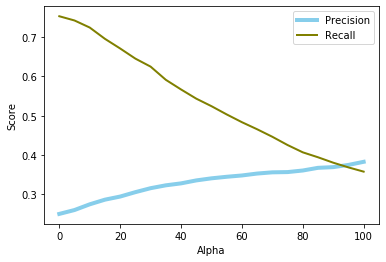

In [0]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

for i in np.linspace(0,100,21):
  clf = ComplementNB(alpha=i,fit_prior=False, class_prior=None, norm=False)
  clf.fit(normalized_x, y_train)

  clf.score(normalized_x_test, y_test)

  y_pred = clf.predict(normalized_x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(i)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': np.linspace(0,100,21), 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.legend()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='ball_tree', leaf_size=30, p=1, metric='canberra', metric_params=None, n_jobs=None)
neigh.fit(train_pca, y_train)

neigh.score(test_pca, y_test)

0.9162623344054953

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

y_pred = neigh.predict(test_pca)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.7402135231316725
0.12447636146020347
[[16599    73]
 [ 1463   208]]


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=100, weights='distance', algorithm='ball_tree', leaf_size=30, p=1, metric='canberra', metric_params=None, n_jobs=-1)
neigh.fit(x_train_lda, y_train)

neigh.score(x_test_lda, y_test)

y_pred = neigh.predict(x_test_lda)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.5468599033816425
0.33871932974266905
[[16203   469]
 [ 1105   566]]


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

abclf = AdaBoostClassifier(n_estimators=350, base_estimator=None, learning_rate=0.6, algorithm='SAMME.R', random_state=None)
#scores = cross_val_score(abclf, x_train, y_train, cv=5)
#scores.mean()


In [0]:
abclf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.6,
                   n_estimators=350, random_state=None)

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

y_pred = abclf.predict(x_test)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.9149709302325582
0.75344105326152
[[16555   117]
 [  412  1259]]


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

abclf = AdaBoostClassifier(n_estimators=350, base_estimator=None, learning_rate=0.6, algorithm='SAMME.R', random_state=None)

abclf.fit(x_train_lda, y_train)

y_pred = abclf.predict(x_test_lda)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.720125786163522
0.27408737283064033
[[16494   178]
 [ 1213   458]]


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

abclf = AdaBoostClassifier(n_estimators=350, base_estimator=None, learning_rate=0.6, algorithm='SAMME.R', random_state=None)

abclf.fit(normalized_x, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.6,
                   n_estimators=350, random_state=None)

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

y_pred = abclf.predict(normalized_x_test)

print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.7558226897069872
0.6020347097546379
[[16347   325]
 [  665  1006]]


5
0.7164634146341463
0.2812687013764213
10
0.7546948356807511
0.38479952124476363
15
0.8983050847457628
0.5709156193895871
20
0.7998595505617978
0.6816277678037104
25
0.9059233449477352
0.6223818073010173
30
0.9090909090909091
0.6702573309395572
35
0.9077901430842608
0.6834230999401556
40
0.8982266769468004
0.6971873129862358
45
0.9000757002271007
0.7115499700777977
50
0.9030075187969925
0.7187312986235787
55
0.8933038999264165
0.7265110712148414
60
0.8867243867243867
0.7354877318970676
65
0.8892908827785818
0.7354877318970676
70
0.8876889848812095
0.7378815080789947
75
0.8921852387843705
0.7378815080789947
80
0.894134477825465
0.7480550568521843
85
0.8961318051575932
0.748653500897666
90
0.8948497854077253
0.748653500897666
95
0.8924501424501424
0.7498503889886295
100
0.8895224518888097
0.7468581687612208
105
0.8953823953823954
0.7426690604428486
110
0.8895224518888097
0.7468581687612208
115
0.8891257995735607
0.748653500897666
120
0.8968481375358166
0.7492519449431478
125
0.902315484

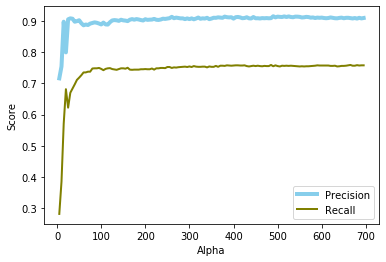

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

for i in range(5, 700, 5):
  abclf = AdaBoostClassifier(n_estimators=i, base_estimator=None, 
                             learning_rate=0.6, algorithm='SAMME.R', random_state=None)
  abclf.fit(x_train, y_train)

  y_pred = abclf.predict(x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(i)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': range(5, 700, 5), 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.legend()

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

for estimators in range(10, 300, 10):
  abclf = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=estimators, subsample=0.7, max_depth=20, min_impurity_decrease=0. , verbose=1, max_features='sqrt', max_leaf_nodes=None)
  abclf.fit(x_train, y_train)

  y_pred = abclf.predict(x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(i)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': range(5, 700, 5), 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.legend()

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5681           0.0105            3.84s
         2           0.5532           0.0094            3.73s
         3           0.5293           0.0111            3.37s
         4           0.5189           0.0081            3.08s
         5           0.5128           0.0072            2.71s
         6           0.5034           0.0072            2.21s
         7           0.4889           0.0074            1.70s
         8           0.4818           0.0071            1.19s
         9           0.4700           0.0072            0.61s
        10           0.4623           0.0059            0.00s
695
0.0
0.0
      Iter       Train Loss      OOB Improve   Remaining Time 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


         1           0.5673           0.0120            6.94s
         2           0.5456           0.0102            7.50s
         3           0.5345           0.0092            7.84s
         4           0.5245           0.0100            7.71s
         5           0.5069           0.0095            7.66s
         6           0.4954           0.0075            7.56s
         7           0.4812           0.0079            7.27s
         8           0.4769           0.0064            7.01s
         9           0.4662           0.0070            6.58s
        10           0.4589           0.0055            6.15s
        20           0.3837           0.0044            0.00s
695
0.0
0.0
      Iter       Train Loss      OOB Improve   Remaining Time 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


         1           0.5604           0.0120           10.75s
         2           0.5499           0.0108           11.27s
         3           0.5278           0.0107           12.09s
         4           0.5190           0.0089           12.33s
         5           0.5061           0.0076           12.61s
         6           0.5008           0.0085           12.67s
         7           0.4840           0.0082           12.54s
         8           0.4776           0.0066           12.42s
         9           0.4732           0.0056           12.45s
        10           0.4594           0.0063           12.10s
        20           0.3895           0.0038            6.88s
        30           0.3340           0.0033            0.00s
695
0.0
0.0
      Iter       Train Loss      OOB Improve   Remaining Time 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


         1           0.5650           0.0131           13.44s
         2           0.5527           0.0097           15.62s
         3           0.5310           0.0102           16.57s
         4           0.5218           0.0088           17.66s
         5           0.5072           0.0074           18.02s
         6           0.4927           0.0084           18.34s
         7           0.4860           0.0067           18.55s
         8           0.4771           0.0069           18.54s
         9           0.4675           0.0064           18.45s
        10           0.4596           0.0067           18.34s
        20           0.3837           0.0047           13.68s
        30           0.3323           0.0030            7.17s
        40           0.2948           0.0024            0.00s
695
0.0
0.0
      Iter       Train Loss      OOB Improve   Remaining Time 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


         1           0.5709           0.0102           19.09s
         2           0.5511           0.0114           20.83s
         3           0.5325           0.0109           22.50s
         4           0.5233           0.0094           23.22s
         5           0.5087           0.0088           23.57s
         6           0.4977           0.0076           24.47s
         7           0.4864           0.0083           24.46s
         8           0.4787           0.0074           24.48s
         9           0.4653           0.0064           24.60s
        10           0.4578           0.0062           24.57s
        20           0.3852           0.0039           20.74s
        30           0.3336           0.0030           14.56s
        40           0.2897           0.0025            7.46s
        50           0.2602           0.0019            0.00s
695
0.0
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5654           0.0120           19.67s
         2           0.5467           0.0122           20.55s
         3           0.5317           0.0110           22.38s
         4           0.5228           0.0093           24.10s
         5           0.5092           0.0090           25.35s
         6           0.4967           0.0083           26.31s
         7           0.4860           0.0072           27.46s
         8           0.4748           0.0073           27.84s
         9           0.4636           0.0065           28.20s
        10           0.4566           0.0069           28.27s
        20           0.3850           0.0042           26.09s
        30           0.3316           0.0030           20.80s
        40           0.2928           0.0025           14.54s
        50           0.2583           0.0022            7.48s
        60           0.2318           0.0019            0.00s
695
1.0

ValueError: ignored

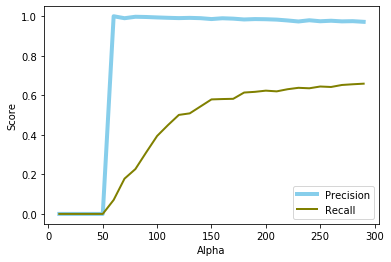

In [0]:
# Data
df=pd.DataFrame({'x': range(10, 300, 10), 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("estimators")
plt.ylabel("Score")
plt.legend()

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

abclf = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=200, subsample=0.7, max_depth=20, min_impurity_decrease=0. , verbose=1, max_features='sqrt', max_leaf_nodes=None)
abclf.fit(x_train, y_train)

y_pred = abclf.predict(x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5637           0.0130            1.22m
         2           0.5460           0.0105            1.38m
         3           0.5363           0.0098            1.48m
         4           0.5187           0.0084            1.62m
         5           0.5068           0.0093            1.70m
         6           0.4979           0.0073            1.79m
         7           0.4898           0.0074            1.84m
         8           0.4789           0.0076            1.92m
         9           0.4671           0.0068            1.94m
        10           0.4570           0.0055            1.96m
        20           0.3864           0.0039            2.10m
        30           0.3323           0.0030            2.09m
        40           0.2939           0.0026            2.04m
        50           0.2586           0.0022            1.94m
        60           0.2306           0.0017            1.84m
       

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

abclf = GradientBoostingClassifier(loss='deviance', learning_rate=0.032, n_estimators=300, subsample=0.5, max_depth=100, min_impurity_decrease=0.1 , verbose=1, max_features='sqrt', max_leaf_nodes=None, ccp_alpha=0)
abclf.fit(x_train, y_train)

y_pred = abclf.predict(x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5201           0.0348            1.27m
         2           0.4884           0.0328            1.11m
         3           0.4600           0.0241            1.06m
         4           0.4369           0.0172            1.11m
         5           0.4134           0.0137            1.16m
         6           0.3984           0.0127            1.18m
         7           0.3823           0.0118            1.17m
         8           0.3635           0.0129            1.15m
         9           0.3514           0.0096            1.14m
        10           0.3366           0.0109            1.12m
        20           0.2452           0.0054            1.02m
        30           0.1868           0.0030           57.79s
        40           0.1490           0.0021           53.08s
        50           0.1226           0.0019           48.28s
        60           0.1052           0.0011           43.87s
       

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

abclf = GradientBoostingClassifier(loss='deviance', learning_rate=0.032, n_estimators=300, subsample=0.5, max_depth=100, min_impurity_decrease=0.1 , verbose=1, max_features='sqrt', max_leaf_nodes=None, ccp_alpha=0)
abclf.fit(x_train_lda, y_train)

y_pred = abclf.predict(x_test_lda)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5414           0.0190            1.13m
         2           0.5093           0.0139            1.09m
         3           0.4864           0.0121            1.06m
         4           0.4684           0.0098            1.05m
         5           0.4587           0.0085            1.02m
         6           0.4408           0.0069            1.02m
         7           0.4320           0.0060            1.01m
         8           0.4223           0.0054            1.01m
         9           0.4109           0.0049           59.58s
        10           0.4008           0.0046           58.90s
        20           0.3365           0.0019           53.27s
        30           0.3035           0.0012           47.40s
        40           0.2823           0.0007           40.86s
        50           0.2662           0.0004           35.42s
        60           0.2567           0.0002           31.06s
       

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5813           0.0012            1.14m
         2           0.5737           0.0011            1.22m
         3           0.5839           0.0012            1.20m
         4           0.5731           0.0012            1.16m
         5           0.5744           0.0011            1.16m
         6           0.5715           0.0012            1.15m
         7           0.5762           0.0010            1.16m
         8           0.5708           0.0012            1.15m
         9           0.5658           0.0010            1.15m
        10           0.5685           0.0010            1.16m
        20           0.5476           0.0010            1.11m
        30           0.5481           0.0010            1.06m
        40           0.5294           0.0008            1.01m
        50           0.5155           0.0009           58.27s
        60           0.5037           0.0008           55.71s
       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.001
0.0
0.0
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5778           0.0021            1.30m
         2           0.5733           0.0021            1.32m
         3           0.5744           0.0023            1.27m
         4           0.5609           0.0020            1.29m
         5           0.5690           0.0024            1.24m
         6           0.5629           0.0023            1.21m
         7           0.5611           0.0024            1.18m
         8           0.5592           0.0023            1.14m
         9           0.5541           0.0020            1.14m
        10           0.5497           0.0022            1.12m
        20           0.5311           0.0015            1.11m
        30           0.5163           0.0017            1.05m
        40           0.4866           0.0014            1.01m
        50           0.4726           0.0011           58.32s
        60           0.4595           0.0012           

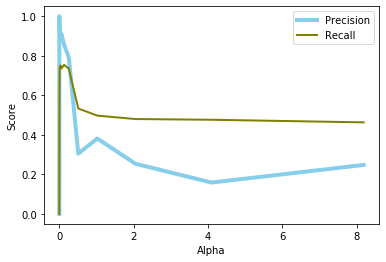

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

valor = 0.001
lista = []
while valor < 10:
  lista.append(valor)
  valor += valor

for rate in lista:
  abclf = GradientBoostingClassifier(loss='deviance', learning_rate=rate, 
                                     n_estimators=300, subsample=0.5, max_depth=100, 
                                     min_impurity_decrease=0.1 , verbose=1, 
                                     max_features='sqrt', max_leaf_nodes=None, ccp_alpha=0)
  abclf.fit(x_train, y_train)

  y_pred = abclf.predict(x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(rate)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': lista, 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.legend()

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

abclf = GradientBoostingClassifier(loss='deviance', learning_rate=0.016, 
                                     n_estimators=500, subsample=0.4, max_depth=100, 
                                     min_impurity_decrease=0.1 , verbose=1, 
                                     max_features="sqrt", max_leaf_nodes=None, ccp_alpha=0, 
                                   n_iter_no_change=10, validation_fraction=0.5)
abclf.fit(x_train, y_train)

y_pred = abclf.predict(x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(abclf.score(x_test, y_test))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5412           0.0153           33.36s
         2           0.5316           0.0168           33.07s
         3           0.5174           0.0133           34.08s
         4           0.4990           0.0126           33.64s
         5           0.5018           0.0095           33.21s
         6           0.4728           0.0119           32.40s
         7           0.4672           0.0076           33.03s
         8           0.4538           0.0074           33.78s
         9           0.4414           0.0084           33.69s
        10           0.4336           0.0064           33.75s
        20           0.3582           0.0050           31.63s
        30           0.3010           0.0041           29.75s
        40           0.2568           0.0026           28.85s
        50           0.2228           0.0017           27.43s
        60           0.2007           0.0019           26.07s
       

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5061           0.0297           23.12s
         2           0.5053           0.0266           20.47s
         3           0.4808           0.0223           19.88s
         4           0.4542           0.0139           20.52s
         5           0.4616           0.0154           20.17s
         6           0.4375           0.0114           20.58s
         7           0.4224           0.0118           20.32s
         8           0.3886           0.0112           20.27s
         9           0.4028           0.0091           20.42s
        10           0.4019           0.0096           20.09s
        20           0.2951           0.0079           17.83s
        30           0.2546           0.0032           16.59s
        40           0.2230           0.0019           15.82s
        50           0.1923           0.0020           14.99s
        60           0.1704           0.0012           14.19s
       

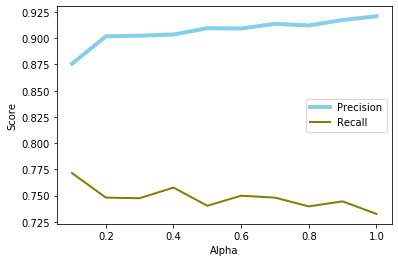

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

lista = np.linspace(0.1 ,1,10)

for subS in lista:
  abclf = GradientBoostingClassifier(loss='deviance', learning_rate=0.032, n_estimators=300, subsample=subS, max_depth=100, min_impurity_decrease=0.1 , verbose=1, max_features='sqrt', max_leaf_nodes=None, ccp_alpha=0)
  abclf.fit(x_train, y_train)

  y_pred = abclf.predict(x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(subS)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': lista, 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.legend()

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

abclf = GradientBoostingClassifier(loss='deviance', learning_rate=0.032, n_estimators=200, subsample=0.5, max_depth=10, min_impurity_decrease=0. , verbose=1, max_features='sqrt', max_leaf_nodes=None)
abclf.fit(normalized_x, y_train)

y_pred = abclf.predict(normalized_x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5729           0.0108            4.97m
         2           0.5574           0.0100            5.01m
         3           0.5467           0.0093            4.98m
         4           0.5392           0.0084            4.95m
         5           0.5301           0.0082            4.93m
         6           0.5189           0.0077            4.94m
         7           0.5104           0.0071            4.94m
         8           0.5032           0.0067            4.94m
         9           0.4945           0.0067            4.92m
        10           0.4909           0.0063            4.90m
        20           0.4279           0.0042            4.61m
        30           0.3905           0.0031            4.38m
        40           0.3548           0.0027            4.17m
        50           0.3274           0.0020            3.94m
        60           0.3033           0.0016            3.70m
       

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio=0.5, random_state=0, tol=0.0001, C=1e20, fit_intercept=True, class_weight='balanced', max_iter=5000, verbose=1, n_jobs=1)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4000 epochs took 249 seconds
0.3447733822373592
0.7875523638539796
[[14171  2501]
 [  355  1316]]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min finished


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio=0.5, random_state=0, tol=0.0001, C=1e20, fit_intercept=True, class_weight='balanced', max_iter=100, verbose=1, n_jobs=1)
clf.fit(normalized_x, y_train)

y_pred = clf.predict(normalized_x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 6 seconds
0.6093344857389801
0.42190305206463197
[[16220   452]
 [  966   705]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


In [0]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x_train, y_train)
clf = LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio=0.5, random_state=0, tol=0.0001, C=1e20, fit_intercept=True, class_weight=None, max_iter=5000, verbose=1, n_jobs=-1)
clf.fit(x_res, y_res)

y_pred = clf.predict(x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 47 seconds
0.30994989262705797
0.77737881508079
[[13780  2892]
 [  372  1299]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.1s finished


In [0]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio=0.5, random_state=0, tol=0.0001, C=1e20, fit_intercept=True, class_weight=None, max_iter=5000, verbose=1, n_jobs=-1)
clf.fit(x_train_lda, y_train)

y_pred = clf.predict(x_test_lda)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 90 epochs took 0 seconds
0.6868811881188119
0.33213644524236985
[[16419   253]
 [ 1116   555]]


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 1512 epochs took 103 seconds
0.001
0.29490124023886083
0.7684021543985637


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 2100 epochs took 131 seconds
0.002
0.3088589311506981
0.767803710353082


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 2683 epochs took 181 seconds
0.004
0.3213572854291417
0.7707959305804907


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3166 epochs took 198 seconds
0.008
0.3326551373346897
0.7827648114901257


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3512 epochs took 232 seconds
0.016
0.33694810224632066
0.7809694793536804


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3733 epochs took 232 seconds
0.032
0.34097421203438394
0.7833632555356074


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3859 epochs took 238 seconds
0.064
0.34329140461215935
0.7839616995810892


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3928 epochs took 245 seconds
0.128
0.3439056356487549
0.7851585876720527


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3964 epochs took 250 seconds
0.256
0.3440775681341719
0.7857570317175344


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3982 epochs took 248 seconds
0.512
0.3442579968536969
0.7857570317175344


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3991 epochs took 253 seconds
1.024
0.3443396226415094
0.7863554757630161


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3996 epochs took 268 seconds
2.048
0.3444211629125196
0.7869539198084979


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3998 epochs took 256 seconds
4.096
0.34468308014667365
0.7875523638539796


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3999 epochs took 255 seconds
8.192
0.34468308014667365
0.7875523638539796


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.3min finished


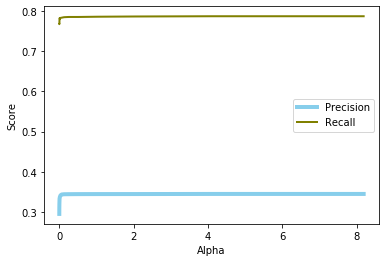

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

valor = 0.001
lista = []
while valor < 12:
  lista.append(valor)
  valor += valor

for cVal in lista:
  clf = LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio=0.5, random_state=0, tol=0.0001, C=cVal, fit_intercept=True, class_weight='balanced', max_iter=5000, verbose=1, n_jobs=-1)
  clf.fit(x_train, y_train)

  y_pred = clf.predict(x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(cVal)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': lista, 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.legend()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 1 seconds
10
0.25742574257425743
0.7312986235786954


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 1 seconds
20
0.26730310262529833
0.7372830640335128


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 3 seconds
40
0.27503308337009263
0.7462597247157391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 5 seconds
80
0.28327338129496404
0.7540394973070018


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 11 seconds
160
0.2909132524605173
0.760622381807301


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 20 seconds
320
0.29769927957239134
0.7666068222621185


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 40 seconds
640
0.3076923076923077
0.7779772591262717


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   40.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 83 seconds
1280
0.32206710751898115
0.7869539198084979


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 163 seconds
2560
0.3346094946401225
0.7845601436265709


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3999 epochs took 255 seconds
5120
0.34468308014667365
0.7875523638539796


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.3min finished


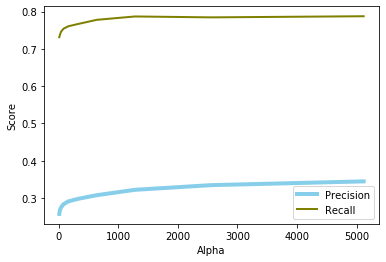

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

valor = 10
lista = []
while valor < 6000:
  lista.append(valor)
  valor += valor

for maxIter in lista:
  clf = LogisticRegression(penalty='elasticnet', solver='saga' , 
                           l1_ratio=0.5, random_state=0, tol=0.0001, C=8, 
                           fit_intercept=True, class_weight='balanced', 
                           max_iter=maxIter, verbose=1, n_jobs=-1)
  
  clf.fit(x_train, y_train)

  y_pred = clf.predict(x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(maxIter)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': lista, 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.legend()

In [0]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import Lasso
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x_train, y_train)
clf = Lasso(alpha=0.4, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='random')
clf.fit(x_res, y_res)

y_pred = clf.predict(x_test)

currPrec = precision_score(y_test, y_pred.round(), average='binary')
currRec = recall_score(y_test, y_pred.round())

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred.round()))


0.2047703180212014
0.6935966487133453
[[12171  4501]
 [  512  1159]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

#model
MOD = RandomForestClassifier() 
#Implemente RandomSearchCV
m_params = { 
            "RF": {
                    "n_estimators" : np.linspace(2, 500, 500, dtype = "int"),  
                    "max_depth": [5, 20, 30, None], 
                    "min_samples_split": np.linspace(2, 50, 50, dtype = "int"),  
                    "max_features": ["sqrt", "log2",10, 20, None],
                    "oob_score": [True],
                    "bootstrap": [True]
                    },
            }
scoreFunction = {"recall": "recall", "precision": "precision"}
random_search = RandomizedSearchCV(MOD,
                                    param_distributions = m_params["RF"], 
                                    n_iter = 20,
                                    scoring = scoreFunction,               
                                    refit = "recall",
                                    return_train_score = True,
                                    random_state = 42,
                                    cv = 5,
                                    verbose = 1) 

#trains and optimizes the model
random_search.fit(x_train, y_train)

#recover the best model

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x_train, y_train)
clf = MLPClassifier(solver='sgd', activation="tanh", alpha=0.1, hidden_layer_sizes=(300,42,18,8,4,2), 
                    random_state=1, verbose=1, max_iter=1000, learning_rate="adaptive")
clf.fit(normalized_x, y_train)

y_pred = clf.predict(normalized_x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Iteration 1, loss = 0.48466697
Iteration 2, loss = 0.34536264
Iteration 3, loss = 0.33782932
Iteration 4, loss = 0.33675047
Iteration 5, loss = 0.33644604
Iteration 6, loss = 0.33625590
Iteration 7, loss = 0.33608848
Iteration 8, loss = 0.33592234
Iteration 9, loss = 0.33575862
Iteration 10, loss = 0.33559446
Iteration 11, loss = 0.33543261
Iteration 12, loss = 0.33526908
Iteration 13, loss = 0.33510594
Iteration 14, loss = 0.33494366
Iteration 15, loss = 0.33478496
Iteration 16, loss = 0.33462493
Iteration 17, loss = 0.33446269
Iteration 18, loss = 0.33430584
Iteration 19, loss = 0.33414563
Iteration 20, loss = 0.33398526
Iteration 21, loss = 0.33382787
Iteration 22, loss = 0.33366995
Iteration 23, loss = 0.33351195
Iteration 24, loss = 0.33335627
Iteration 25, loss = 0.33320021
Iteration 26, loss = 0.33304187
Iteration 27, loss = 0.33288731
Iteration 28, loss = 0.33273134
Iteration 29, loss = 0.33257393
Iteration 30, loss = 0.33241817
Iteration 31, loss = 0.33226371
Iteration 32, los

In [0]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#Precision: 34
#recall: 78
#lasso = Lasso(alpha=0.4, fit_intercept=True, normalize=False, precompute=False, 
           # copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, 
           # positive=False, random_state=None, selection='random')
#Precision: 34
#recall: 78
lr = LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio=0.5, 
                         random_state=0, tol=0.0001, C=8, fit_intercept=True, 
                         class_weight='balanced', max_iter=5012, verbose=1, n_jobs=-1)
#Precision: 91
#recall: 77
gbclf = GradientBoostingClassifier(loss='deviance', learning_rate=0.032,  
                                   n_estimators=300, subsample=0.4, max_depth=100, 
                                   min_impurity_decrease=0.1 , verbose=1, 
                                   max_features='sqrt', max_leaf_nodes=None, ccp_alpha=0)
#Precision: 98
#recall: 63
gbclfP = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=250, 
                                   subsample=0.7, max_depth=20, min_impurity_decrease=0. , 
                                   verbose=1, max_features='sqrt', max_leaf_nodes=None)
#Precision: 33
#recall: 80
sv = SVC(C=2, kernel="poly", degree=3, coef0=0.6)

estimators = [
              #("lasso", lasso),
              ("lr", lr),
              ("gbclf", gbclf),
              ("gbclfP", gbclfP),
              ("sv", sv)
]


clf = StackingClassifier(
  estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42)
)

clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.0min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5265           0.0362           50.68s
         2           0.4984           0.0288           45.20s
         3           0.4614           0.0243           44.29s
         4           0.4420           0.0191           44.29s
         5           0.4266           0.0159           44.03s
         6           0.4044           0.0150           43.39s
         7           0.3845           0.0126           43.07s
         8           0.3727           0.0096           43.43s
         9           0.3534           0.0116           42.72s
        10           0.3419           0.0102           42.75s
        20           0.2550           0.0052           40.06s
        30           0.1996           0.0028           37.61s
        40           0.1601           0.0022           35.08s
        50           0.1354           0.0013           32.77s
        60           0.1128           0.0018           30.09s
       

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.4min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5244           0.0336           44.14s
         2           0.4782           0.0315           38.21s
         3           0.4588           0.0195           37.90s
         4           0.4436           0.0164           37.55s
         5           0.4228           0.0165           36.51s
         6           0.4083           0.0137           35.68s
         7           0.3784           0.0138           34.57s
         8           0.3639           0.0121           33.80s
         9           0.3607           0.0106           33.76s
        10           0.3484           0.0091           33.30s
        20           0.2517           0.0049           29.43s
        30           0.1977           0.0036           27.59s
        40           0.1625           0.0024           25.98s
        50           0.1343           0.0014           24.24s
        60           0.1143           0.0007           22.01s
       

In [0]:
x_train.shape

(73370, 42)

In [0]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]


initial_feature_names = list(x.columns) 
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

     0                         1
0  PC0            glucose_apache
1  PC1          d1_platelets_min
2  PC2  d1_sysbp_noninvasive_max
3  PC3          d1_heartrate_max
4  PC4                d1_bun_max
5  PC5                d1_bun_max


In [0]:
pca.n_components_

6